### CIFAR 100
Intentar conseguir el mejor score (fine tuning) con el dataset CIFAR 100 (se puede utilizar arquitecturas no secuenciales).
Hacer distintas predicciones con la red y plotear los resultados.

Comparar, con la función show_history, el performance de varias (<10) NN's con distintas neuronas y capas.
Obtener las siguientes gráficas (longitud <20):
- score vs Batch_size (con la arquitectura conseguida previamente)
- score vs nº neuronas (con las capas de la arquitectura conseguida previamente)

Hacer la comparativa de scores (acc, recall, precision, f1, confusion matrix) entre los siguientes modelos:
- Random Forest
- Otro modelo a elegir de Machine Learning
- Una red neuronal
- Random forest sobre el histograma del LBP
- Una red neuronal sobre el histograma del LBP

LBP: https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

In [1]:
pip install PyQt5

In [2]:
pip install tensorflow_decision_forests 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
import PyQt5
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import tensorflow_decision_forests as tfdf
import seaborn as sns
sns.set()
from skimage import feature
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [4]:
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import LearningRateScheduler
import tensorflow as tf
from tensorflow.keras import backend as K


def show_history(history, metrics=['accuracy']):
    """
    Visualize history
    :param history:
    :return:
    """

    # Plot history: Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    for metric in metrics:
        # Plot history:
        plt.plot(history.history[metric])
        plt.plot(history.history['val_' + metric])
        plt.title(metric + ' history')
        plt.ylabel(metric + ' value (%)')
        plt.xlabel('No. epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()


def step_decay(epochs_drop):
    def step_decay_fun(epoch):
        initial_lrate = 0.001
        drop = 0.000001
        lrate = initial_lrate * tf.math.pow(drop, tf.math.floor((1+epoch)/epochs_drop))
        return lrate
    return step_decay_fun


def r2_keras(y_true, y_pred):
    """
    Custom R2-score metrics for keras backend
    :param y_true: valor real
    :type y_true: Tensor
    :param y_pred: valor predicho
    :type y_pred: Tensor
    :return: r2 score
    :rtype: tensor
    """
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())



In [5]:
from keras.datasets import cifar100

# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train/255
x_test = x_test/255

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


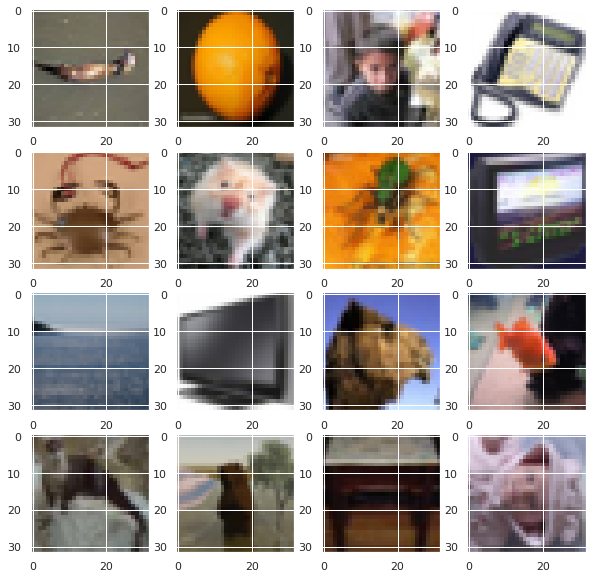

In [6]:
# Show randomly 16 images in the CIFAR-100
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

Comparar, con la función show_history, el performance de varias (<10) NN's con distintas neuronas y capas. Obtener las siguientes gráficas (longitud <20):

- score vs Batch_size (con la arquitectura conseguida previamente)
- score vs nº neuronas (con las capas de la arquitectura conseguida previamente)

Hacer la comparativa de scores (acc, recall, precision, f1, confusion matrix) entre los siguientes modelos:

- Random Forest
- Otro modelo a elegir de Machine Learning
- Una red neuronal
- Random forest sobre el histograma del LBP
- Una red neuronal sobre el histograma del LBP

# Arquitectura conseguida previamente

In [ ]:
# capas de la red
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=1000, activation='sigmoid')(input_flat)
layer = layers.Dense(units=500, activation='sigmoid')(layer)
layer = layers.Dense(units=200, activation='sigmoid')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
Total params: 3,693,800
Trainable params: 3,693,800
Non-train

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=20,
                           validation_data=(x_test, y_test))

Epoch 1/20
1667/1667 [==============================] - 47s 28ms/step - loss: 4.6187 - accuracy: 0.0092 - val_loss: 4.6069 - val_accuracy: 0.0105
Epoch 2/20
1667/1667 [==============================] - 48s 29ms/step - loss: 4.6075 - accuracy: 0.0104 - val_loss: 4.6038 - val_accuracy: 0.0107
Epoch 3/20
1667/1667 [==============================] - 52s 31ms/step - loss: 4.6052 - accuracy: 0.0109 - val_loss: 4.6018 - val_accuracy: 0.0171
Epoch 4/20
1667/1667 [==============================] - 35s 21ms/step - loss: 4.6022 - accuracy: 0.0125 - val_loss: 4.5990 - val_accuracy: 0.0100
Epoch 5/20
1667/1667 [==============================] - 36s 22ms/step - loss: 4.5985 - accuracy: 0.0139 - val_loss: 4.5961 - val_accuracy: 0.0146
Epoch 6/20
1667/1667 [==============================] - 36s 21ms/step - loss: 4.5942 - accuracy: 0.0166 - val_loss: 4.5909 - val_accuracy: 0.0100
Epoch 7/20
1667/1667 [==============================] - 36s 22ms/step - loss: 4.5881 - accuracy: 0.0180 - val_loss: 4.5833 -

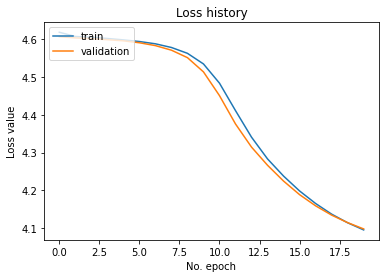

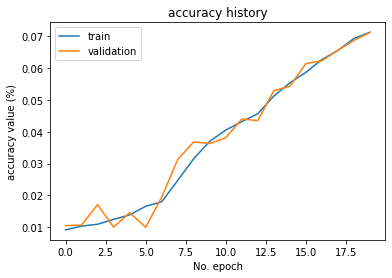

In [ ]:
show_history(history)

# Score vs Batch_size

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)              3073000   
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 200)               100200    
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
Total params: 3,693,800
Trainable params: 3,693,800
Non-tra

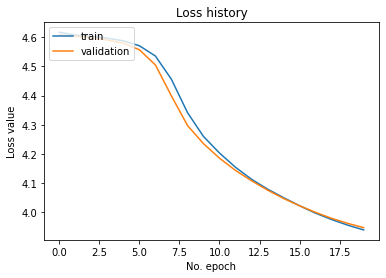

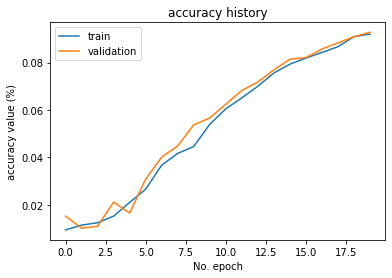


-------------------------------------------------------------------
Epoch 1/20
1250/1250 [==============================] - 32s 26ms/step - loss: 3.9225 - accuracy: 0.0955 - val_loss: 3.9365 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 32s 26ms/step - loss: 3.9146 - accuracy: 0.0962 - val_loss: 3.9308 - val_accuracy: 0.0935
Epoch 3/20
1250/1250 [==============================] - 32s 26ms/step - loss: 3.9079 - accuracy: 0.0962 - val_loss: 3.9229 - val_accuracy: 0.0980
Epoch 4/20
1250/1250 [==============================] - 32s 26ms/step - loss: 3.9011 - accuracy: 0.0983 - val_loss: 3.9180 - val_accuracy: 0.0968
Epoch 5/20
1250/1250 [==============================] - 32s 26ms/step - loss: 3.8953 - accuracy: 0.0986 - val_loss: 3.9110 - val_accuracy: 0.0991
Epoch 6/20
1250/1250 [==============================] - 32s 26ms/step - loss: 3.8894 - accuracy: 0.0997 - val_loss: 3.9076 - val_accuracy: 0.0983
Epoch 7/20
1250/1250 [==============================] -

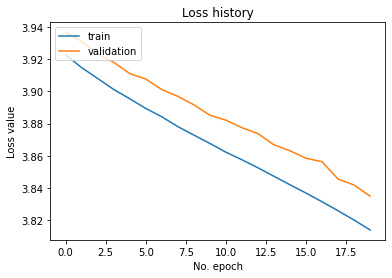

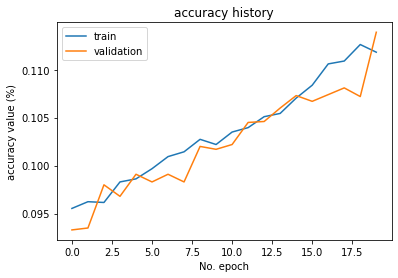


-------------------------------------------------------------------
Epoch 1/20
1000/1000 [==============================] - 30s 30ms/step - loss: 3.8073 - accuracy: 0.1162 - val_loss: 3.8286 - val_accuracy: 0.1140
Epoch 2/20
1000/1000 [==============================] - 30s 30ms/step - loss: 3.8019 - accuracy: 0.1160 - val_loss: 3.8256 - val_accuracy: 0.1143
Epoch 3/20
1000/1000 [==============================] - 30s 30ms/step - loss: 3.7965 - accuracy: 0.1165 - val_loss: 3.8202 - val_accuracy: 0.1179
Epoch 4/20
1000/1000 [==============================] - 30s 30ms/step - loss: 3.7910 - accuracy: 0.1186 - val_loss: 3.8170 - val_accuracy: 0.1143
Epoch 5/20
1000/1000 [==============================] - 30s 30ms/step - loss: 3.7850 - accuracy: 0.1194 - val_loss: 3.8095 - val_accuracy: 0.1134
Epoch 6/20
1000/1000 [==============================] - 30s 30ms/step - loss: 3.7786 - accuracy: 0.1212 - val_loss: 3.8039 - val_accuracy: 0.1168
Epoch 7/20
1000/1000 [==============================] -

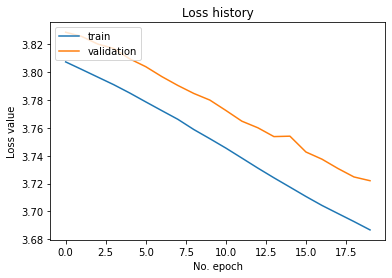

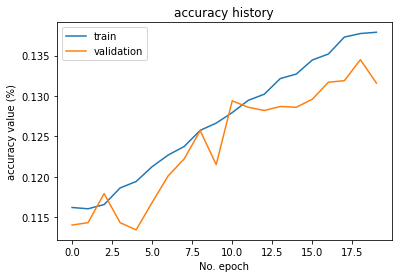

In [ ]:
# capas de la red
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=1000, activation='sigmoid')(input_flat)
layer = layers.Dense(units=500, activation='sigmoid')(layer)
layer = layers.Dense(units=200, activation='sigmoid')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

for i in [4,8,10]:
  
  print ('')
  print('-------------------------------------------------------------------')
  history = model.fit(x=x_train, y=y_train, batch_size=i*5, epochs=20,
                           validation_data=(x_test, y_test))
  print('Batch size = ', i*5)
  show_history(history)
  

#### Los batch sizes más altos conducen a una precisión menor.

# Score vs nº neuronas

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 200)               614600    
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 40)                4040      
                                                                 
 dense_11 (Dense)            (None, 100)               4100      
                                                                 
Total params: 642,840
Trainable params: 642,840
Non-trainab

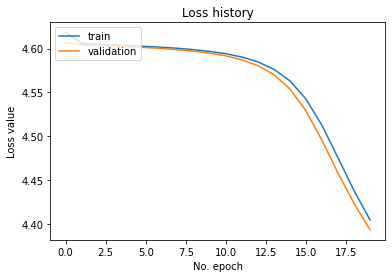

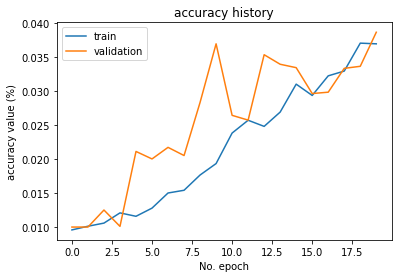

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 600)               1843800   
                                                                 
 dense_13 (Dense)            (None, 300)               180300    
                                                                 
 dense_14 (Dense)            (None, 120)               36120     
                                                                 
 dense_15 (Dense)            (None, 100)               12100     
                                                                 
Total params: 2,072,320
Trainable params: 2,072,320
Non-tra

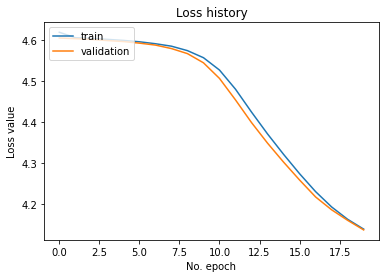

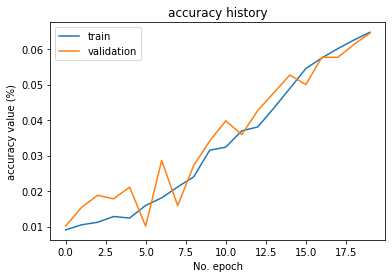

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 1000)              3073000   
                                                                 
 dense_17 (Dense)            (None, 500)               500500    
                                                                 
 dense_18 (Dense)            (None, 200)               100200    
                                                                 
 dense_19 (Dense)            (None, 100)               20100     
                                                                 
Total params: 3,693,800
Trainable params: 3,693,800
Non-tra

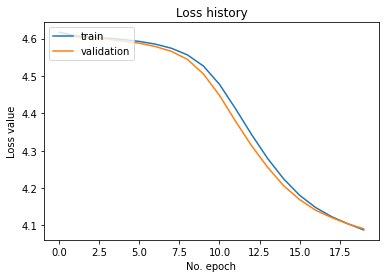

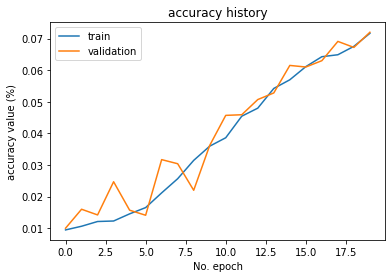

In [ ]:
for i in [2,6,10]:

  # capas de la red
  input = Input(shape=(32,32,3))
  input_flat = layers.Flatten()(input)
  layer = layers.Dense(units=i * 100, activation='sigmoid')(input_flat)
  layer = layers.Dense(units=i * 50, activation='sigmoid')(layer)
  layer = layers.Dense(units=i * 20, activation='sigmoid')(layer)
  output = layers.Dense(units=100, activation='softmax')(layer)

  # creamos el modelo
  model = Model(inputs=input, outputs=output)
  print(model.summary())

  # optimizador
  optimizer = SGD(learning_rate=0.01)

  # función loss
  loss = SparseCategoricalCrossentropy(from_logits=False)

  # métrica
  metrics = ['accuracy']

  # compilamos el modelo
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  print ('')
  print('-------------------------------------------------------------------')
  history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=20,
                           validation_data=(x_test, y_test))
  
  print('Batch size = ', i*2)
  show_history(history)

La cantidad de neuronas afecta el rendimiento del modelo. Cuando una red neuronal tiene muy pocas neuronas, no tiene la capacidad de aprender lo suficiente de los patrones subyacentes para distinguir de manera efectiva. Cuando la red neuronal crece, la red neuronal comienza a funcionar mejor. Sin embargo, llega un punto donde al aumentar el número de neuronas no ayuda demasiado para este problema.

Hacer la comparativa de scores (acc, recall, precision, f1, confusion matrix) entre los siguientes modelos:

- Random Forest
- Otro modelo a elegir de Machine Learning
- Una red neuronal
- Random forest sobre el histograma del LBP
- Una red neuronal sobre el histograma del LBP

## Random Forest y Otro modelo a elegir de Machine Learning

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


The model presented is: RandomForestClassifier()

accuracy: 0.2258

recall: 0.22579999999999997

precition score: 0.2170113568534107

F1: 0.20906289082864007

Confusion matrix:


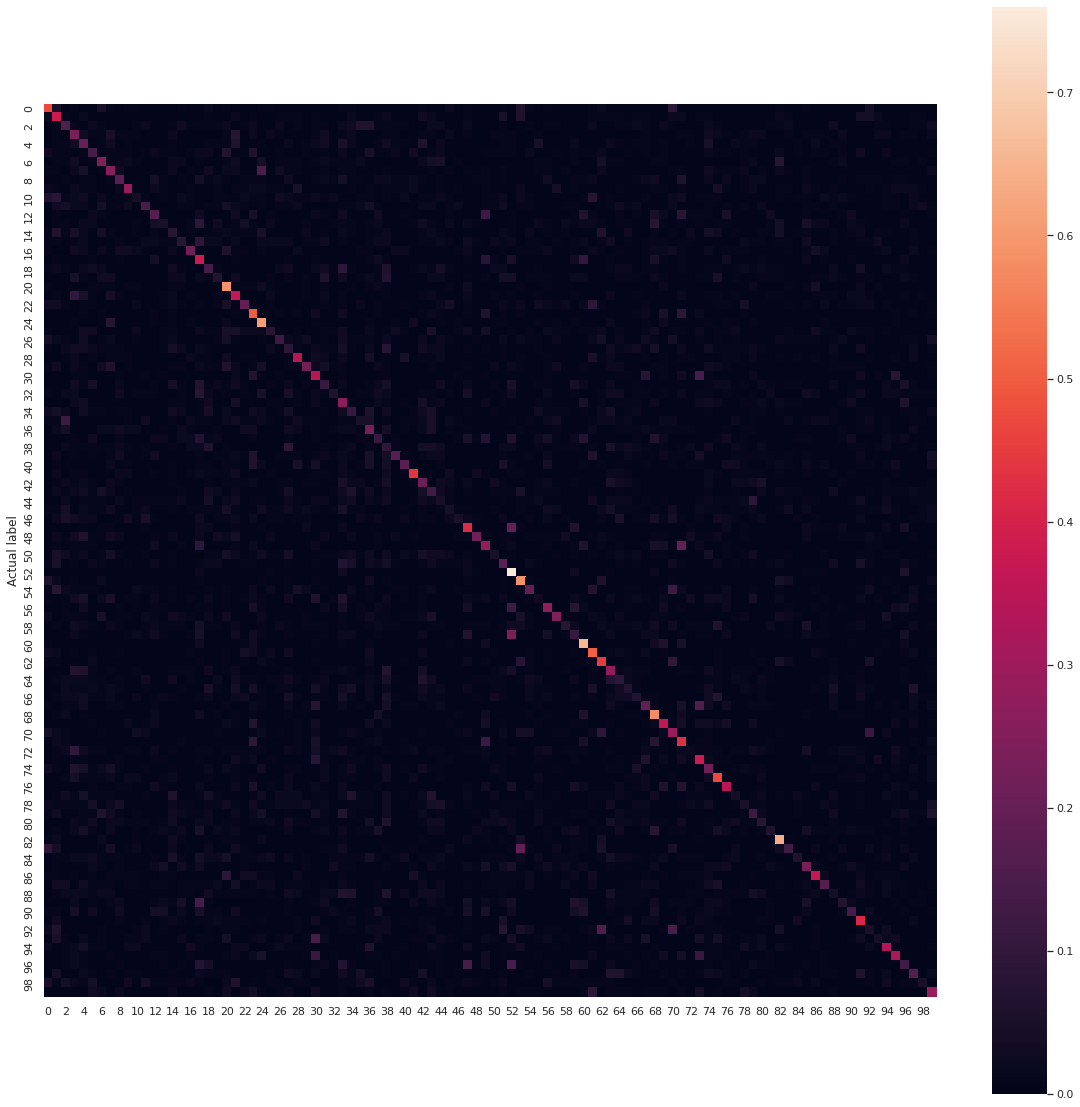

-----------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The model presented is: AdaBoostClassifier()

accuracy: 0.0703

recall: 0.07029999999999999

precition score: 0.05214756699835835

F1: 0.047379140915094195

Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


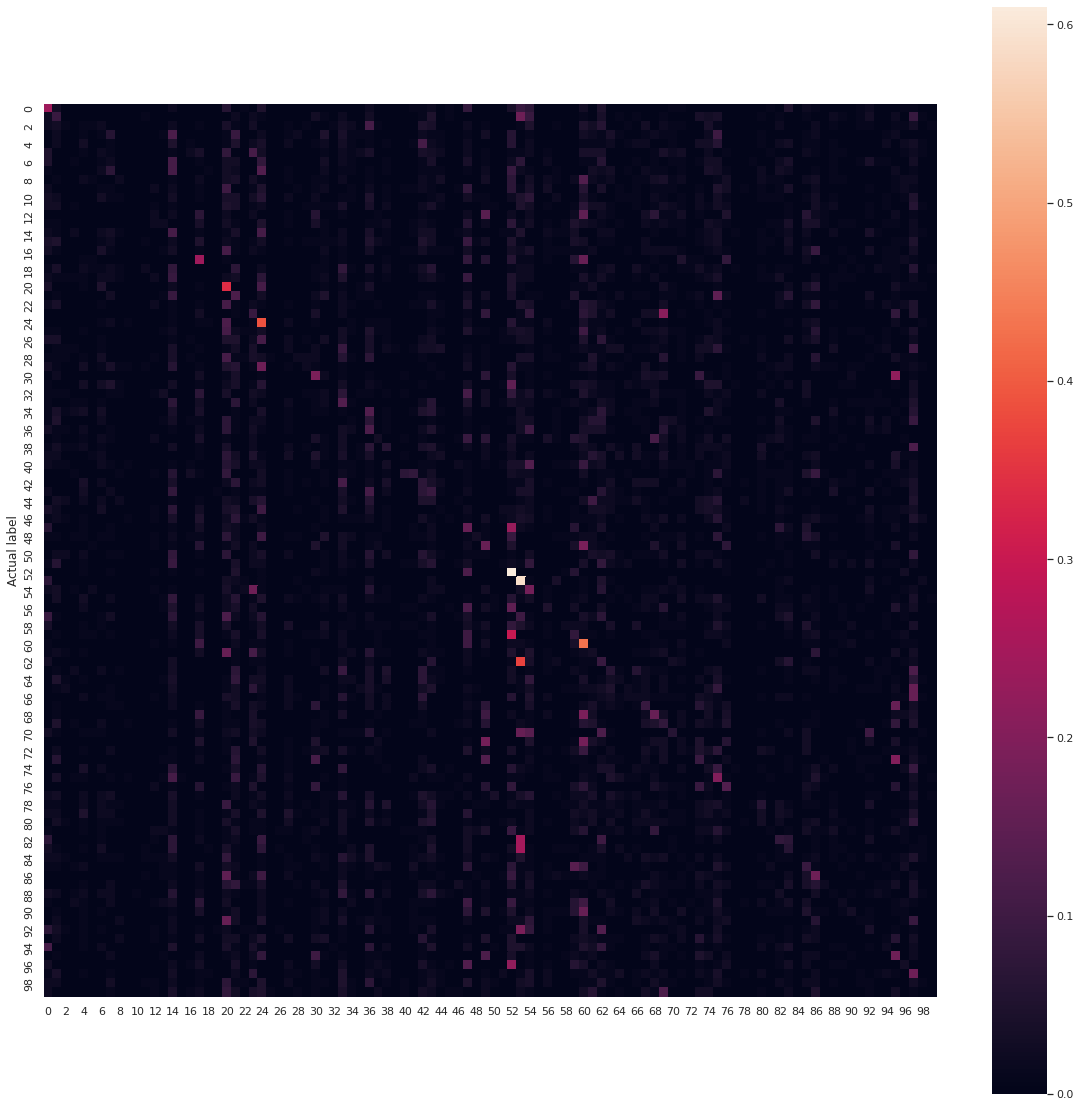

-----------------------------------------------------------


In [6]:
CBClassifier_list = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ]

x_train2 = x_train.reshape((x_train.shape[0],-1))
x_test2 = x_test.reshape((x_test.shape[0],-1))

for classifier in CBClassifier_list:
  results = classifier.fit(x_train2, y_train)     
  print('The model presented is:', classifier)
  print('')
  y_pred = results.predict(x_test2)
  print('accuracy:', accuracy_score(y_test, y_pred))
  print('')
  print('recall:', recall_score(y_test, y_pred, average="macro"))
  print('')
  print('precition score:', precision_score(y_test, y_pred, average="macro"))
  print('')
  print('F1:', f1_score(y_test, y_pred, average="macro"))
  print('')
  print('Confusion matrix:')
  cm_gbt = confusion_matrix(y_test, y_pred, normalize='true')

  plt.figure(figsize=(20,20))
  sns.heatmap(cm_gbt, square = True, annot=False)#, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label')
  plt.show();


  print('-----------------------------------------------------------')

##  Una red neuronal

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1500)              4609500   
                                                                 
 dense_1 (Dense)             (None, 750)               1125750   
                                                                 
 dense_2 (Dense)             (None, 250)               187750    
                                                                 
 dense_3 (Dense)             (None, 100)               25100     
                                                                 
Total params: 5,948,100
Trainable params: 5,948,100
Non-train

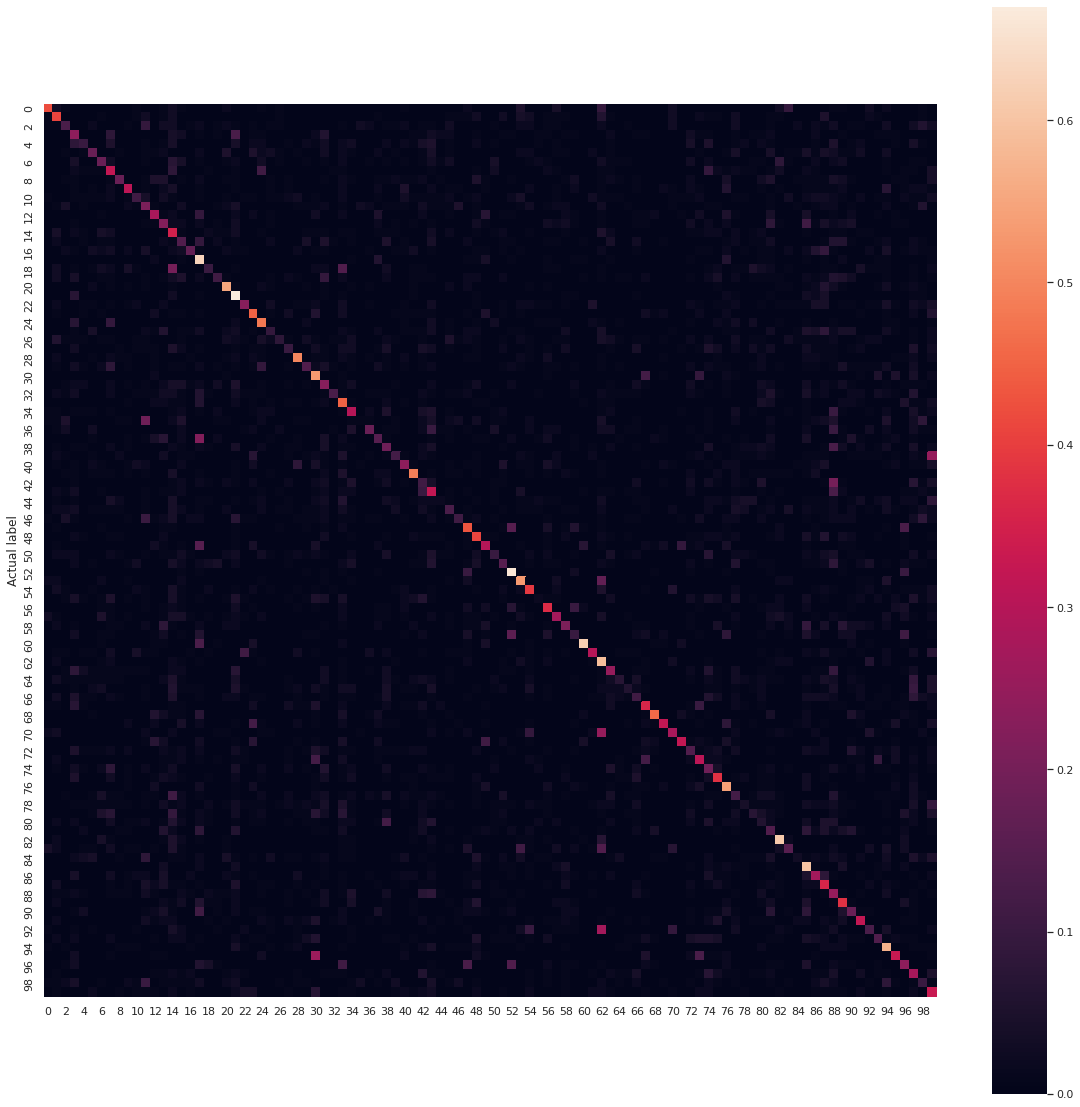

In [5]:
# capas de la red
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=1500, activation='relu')(input_flat)
layer = layers.Dense(units=750, activation='relu')(layer)
layer = layers.Dense(units=250, activation='relu')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.fit(x=x_train, y=y_train, batch_size=30, epochs=20,
                           validation_data=(x_test, y_test))

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy:', accuracy_score(y_test, y_pred))
print('')
print('recall:', recall_score(y_test, y_pred, average="macro"))
print('')
print('precition score:', precision_score(y_test, y_pred, average="macro"))
print('')
print('F1:', f1_score(y_test, y_pred, average="macro"))
print('')
print('Confusion matrix:')
cm_gbt = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(20,20))
sns.heatmap(cm_gbt, square = True, annot=False)#, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')

print('-----------------------------------------------------------')

## Random forest sobre el histograma del LBP

In [7]:
pip install opencv-python

In [8]:
import matplotlib.pyplot as plt

import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from sklearn.svm import LinearSVC
from imutils import paths
import argparse
import cv2
import os

In [9]:
# loop over the training images
x_train_lbp = list()
for image in x_train:
  # lbps
  im = cv2.cvtColor(image.astype('float32'), cv2.COLOR_BGR2GRAY)
  lbp = feature.local_binary_pattern(im, 32, 8)
  # histogram
  (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 35), range=(0, 34))
  # normalize the histogram
  hist = hist.astype('float')
  hist /= (hist.sum() + 1e-7)
  x_train_lbp.append(hist.tolist())
 
x_train_lbp = np.array(x_train_lbp)

In [10]:
# loop over the test images
x_test_lbp = list()
for image in x_test:
  # lbps
  im = cv2.cvtColor(image.astype('float32'), cv2.COLOR_BGR2GRAY)
  lbp = feature.local_binary_pattern(im, 32, 8)
  # histogram
  (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 35), range=(0, 34))
  # normalize the histogram
  hist = hist.astype('float')
  hist /= (hist.sum() + 1e-7)
  x_test_lbp.append(hist.tolist())
 
x_test_lbp = np.array(x_test_lbp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


The model presented is: RandomForestClassifier()

accuracy: 0.0287

recall: 0.0287

precition score: 0.026699838810881785

F1: 0.027042311538902464

Confusion matrix:


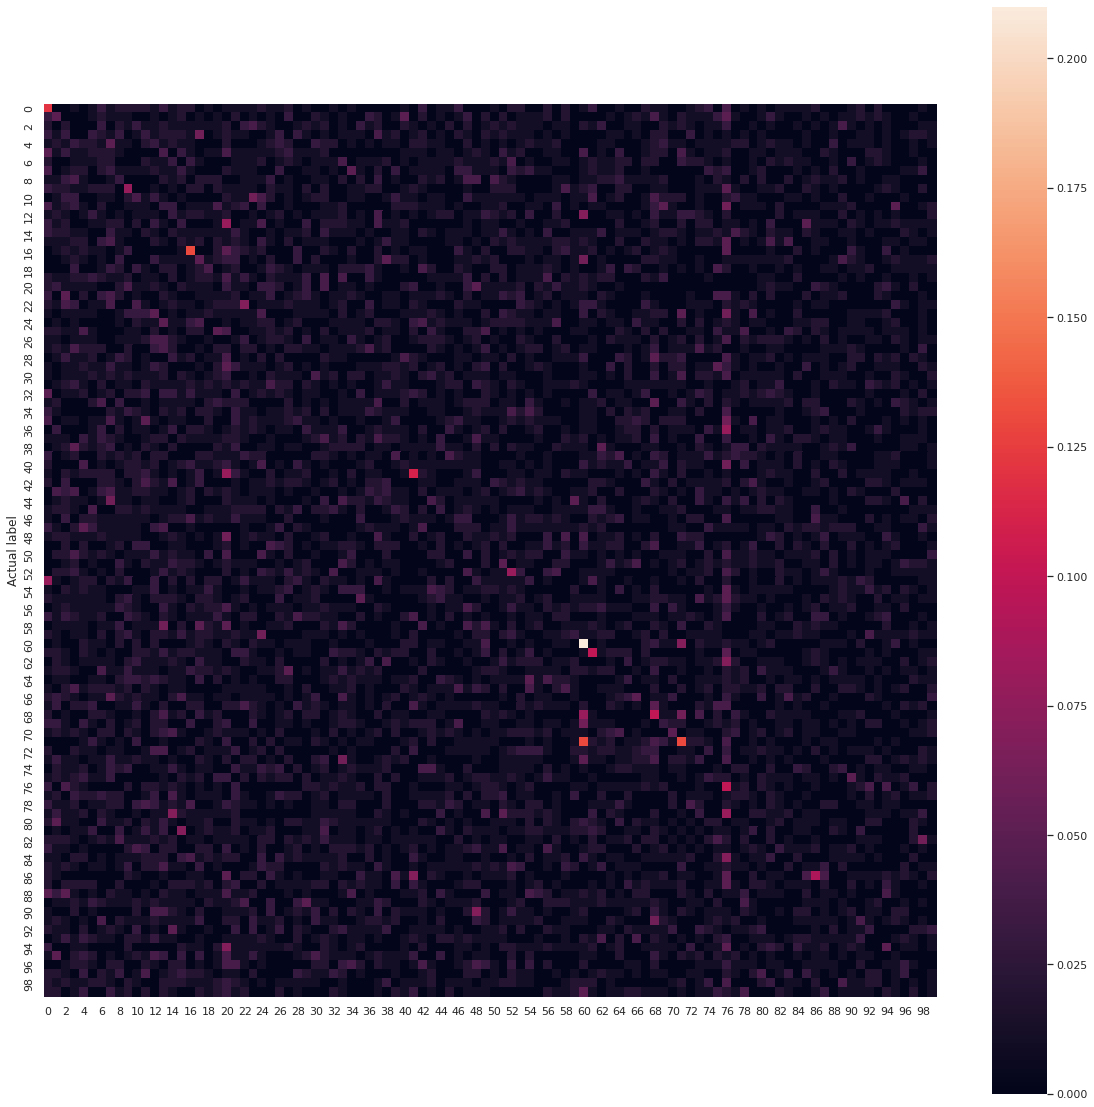

-----------------------------------------------------------


In [11]:
CBClassifier_list = [
    RandomForestClassifier()
    ]

x_train_lbp2 = x_train_lbp.reshape((x_train_lbp.shape[0],-1))
x_test_lbp2 = x_test_lbp.reshape((x_test_lbp.shape[0],-1))

for classifier in CBClassifier_list:
  results = classifier.fit(x_train_lbp2, y_train)     
  print('The model presented is:', classifier)
  print('')
  y_pred = results.predict(x_test_lbp2)
  print('accuracy:', accuracy_score(y_test, y_pred))
  print('')
  print('recall:', recall_score(y_test, y_pred, average="macro"))
  print('')
  print('precition score:', precision_score(y_test, y_pred, average="macro"))
  print('')
  print('F1:', f1_score(y_test, y_pred, average="macro"))
  print('')
  print('Confusion matrix:')
  cm_gbt = confusion_matrix(y_test, y_pred, normalize='true')

  plt.figure(figsize=(20,20))
  sns.heatmap(cm_gbt, square = True, annot=False)#, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label')
  plt.show();


  print('-----------------------------------------------------------')

## Una red neuronal sobre el histograma del LBP

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 34)]              0         
                                                                 
 flatten_1 (Flatten)         (None, 34)                0         
                                                                 
 dense_4 (Dense)             (None, 1500)              52500     
                                                                 
 dense_5 (Dense)             (None, 750)               1125750   
                                                                 
 dense_6 (Dense)             (None, 250)               187750    
                                                                 
 dense_7 (Dense)             (None, 100)               25100     
                                                                 
Total params: 1,391,100
Trainable params: 1,391,100
Non-tra

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------


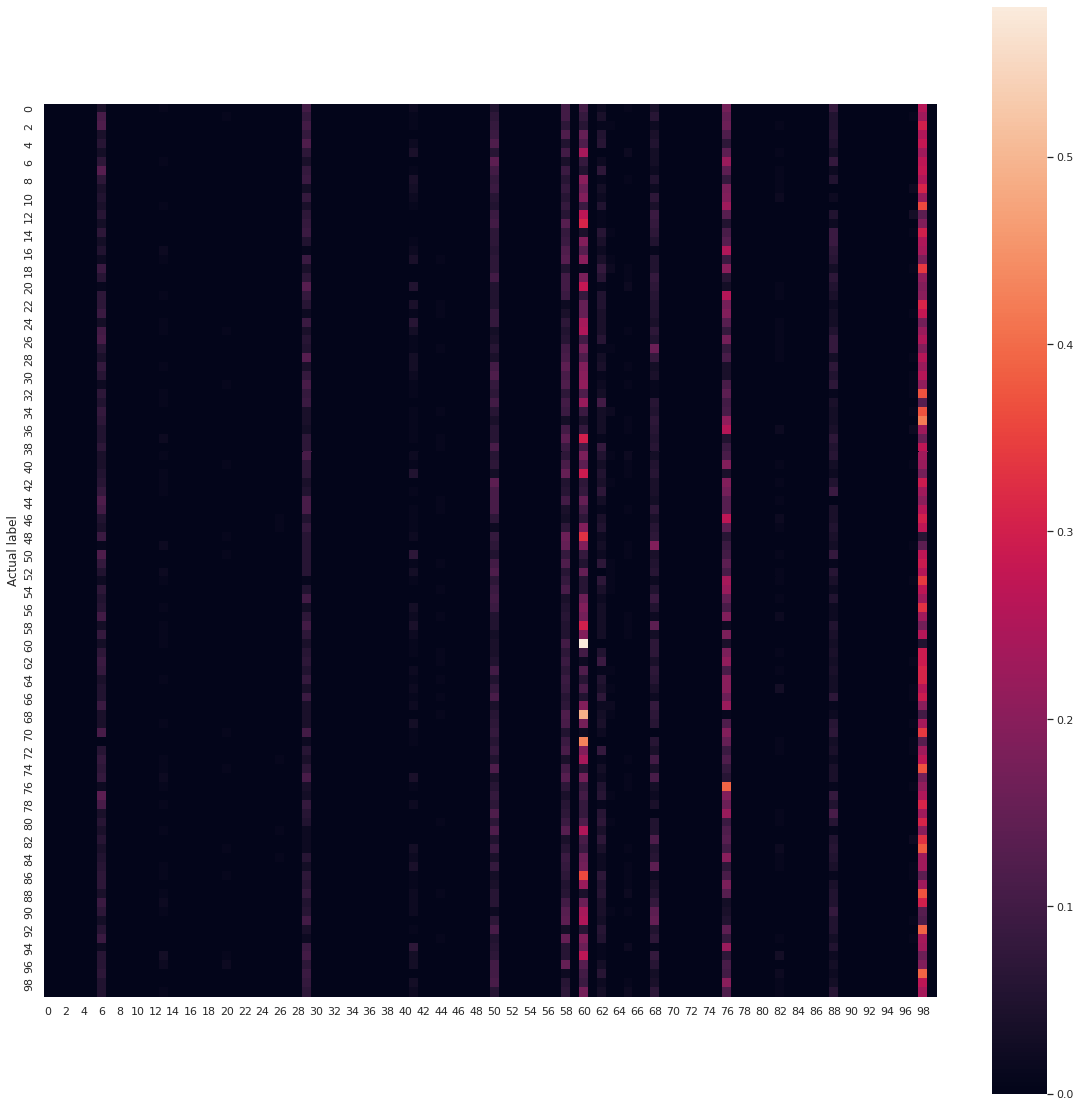

In [14]:
# capas de la red
input = Input(shape=(34))
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=1500, activation='relu')(input_flat)
layer = layers.Dense(units=750, activation='relu')(layer)
layer = layers.Dense(units=250, activation='relu')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.fit(x=x_train_lbp, y=y_train, batch_size=30, epochs=20,
                           validation_data=(x_test_lbp, y_test))

y_pred = model.predict(x_test_lbp)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy:', accuracy_score(y_test, y_pred))
print('')
print('recall:', recall_score(y_test, y_pred, average="macro"))
print('')
print('precition score:', precision_score(y_test, y_pred, average="macro"))
print('')
print('F1:', f1_score(y_test, y_pred, average="macro"))
print('')
print('Confusion matrix:')
cm_gbt = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(20,20))
sns.heatmap(cm_gbt, square = True, annot=False)#, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')

print('-----------------------------------------------------------')

In [13]:
x_train_lbp.shape

(50000, 34)